<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/master/DiffractionAndInterference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diffraction of two slits

##### The diffraction pattern of two slits of width D that are separated by a distance d is the interference pattern of two point sources separated by d multiplied by the diffraction pattern of a slit of width D.

In [1]:
# libraries
import numpy as np
from numpy import sin, cos, pi
import matplotlib.pyplot as plt

In [2]:
π=pi

def β(λ,D,θ):
  return (π/λ)*D*sin(θ)

def α(λ,d,θ):
  return (π/λ)*d*sin(θ) 

In [3]:
def diffractionFactor(β):
  return (sin(β)/β)**2

In [4]:
def interferenceFactor(α):
  return (2*cos(α))**2

In [5]:
def intensityPattern(θ,λ,d,D): 
    return diffractionFactor(β(λ,D,θ))*interferenceFactor(α(λ,d,θ))

In [6]:
θ_b=0.002
θ=np.linspace(-θ_b,θ_b,1000)  # range of angles in radians

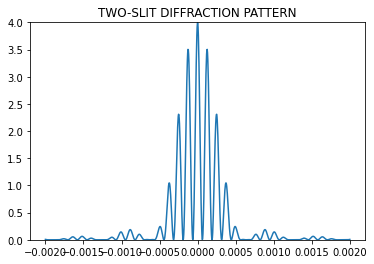

In [7]:
λ=6.32E-7 ## wavelength in (m)
d=0.005 ## distance between slits in (m)
D=0.001 ## width of slits in (m)
plt.plot(θ,intensityPattern(θ,λ,d,D))
plt.ylim(0,4)
plt.title("TWO-SLIT DIFFRACTION PATTERN")
plt.show()

## 2D diffraction (Rectangular Slits)

In [8]:
def diffractionFactor2D(βx,βy):
  return (sin(βx)/βx)**2*(sin(βy)/βy)**2
def interferenceFactor2D(αx,αy):
  return (2*cos(αx))**2*(2*cos(αy))**2
def intensityPattern2D(θx,θy,Dx,Dy,dx,dy,λ): 
    return diffractionFactor2D(β(λ,Dx,θx),β(λ,Dy,θy))*interferenceFactor2D(α(λ,dx,θx),α(λ,dy,θy))

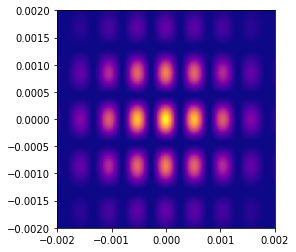

In [9]:
# create data
θ_b=0.002

xMin=-θ_b
yMin=-θ_b
xMax=θ_b
yMax=θ_b
nbins=500

xi, yi = np.mgrid[xMin:xMax:nbins*1j, yMin:yMax:nbins*1j]

Dx=0.0002
Dy=0.0002
dx=0.001
dy=0.0006
λ=5.32E-7
zi = intensityPattern2D(xi,yi,Dx,Dy,dx,dy,λ)
 
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.plasma)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## 2D diffraction (Circular Slit)

In [10]:
from scipy.special.cython_special import j1

In [11]:
# diameter of the aperture
a = 0.01;
def diffractionFactorCircular(βr):
  return (2*j1(βr)/βr)
  #return (2*sin(βr)/βr)**2

diffractionFactorCircularVector = np.vectorize(diffractionFactorCircular)

def intensityPatternCircular(θx,θy,a,λ):
  θr=np.sqrt(θx**2+θy**2)
  return diffractionFactorCircularVector(β(λ,a,θr))


def diffractionFactorIntensityCircular(βr):
  return diffractionFactorCircularVector(βr)**2

diffractionFactorCircularVector = np.vectorize(diffractionFactorCircular)
def intensityPatternCircular(θx,θy,a,λ):
  θr=np.sqrt(θx**2+θy**2)
  return diffractionFactorIntensityCircular(β(λ,a,θr))

def electricFieldPatternCircular(θx,θy,a,λ):
  θr=np.sqrt(θx**2+θy**2)
  return diffractionFactorCircularVector(β(λ,a,θr))

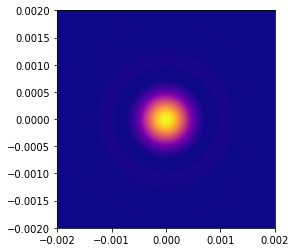

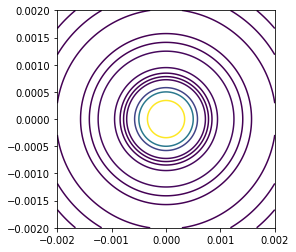

In [13]:
# create data
θ_b=0.002

xMin=-θ_b
yMin=-θ_b
xMax=θ_b
yMax=θ_b
nbins=500

xi, yi = np.mgrid[xMin:xMax:nbins*1j, yMin:yMax:nbins*1j]

a=0.0008
λ=5.32E-7
zi = intensityPatternCircular(xi,yi,a,λ)
 
# Change color palette
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.plasma)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

plt.contour(xi, yi, zi.reshape(xi.shape),[0,0.001,0.01,0.1,0.2,0.5])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()